In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

2. Write a function `my_ls_params(f, x, y)` where x and y are arrays of the same size containing experimental data, and f is a list with each element a function object to a basis vector of the estimation
function.                                                                                        
The output argument, beta, should be an array of the parameters of the least squares regression for x, y, and f.

In [2]:
def my_ls_params(f, x, y):
    n = len(f)  # number of basis functions
    m = len(x)  # number of data points
    X = np.vstack([f[i](x) for i in range(n)]).T  # design matrix
    beta = np.linalg.lstsq(X, y, rcond=None)[0]  # solve least squares problem
    return beta

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
f = [lambda x: x, lambda x: x**2]  # example basis functions: f1(x) = x, f2(x) = x^2

beta = my_ls_params(f, x, y)
print(beta.round(2))

[2. 0.]


3. Write a function `my_func_fit(x,y)` where x and y are column vectors of the same size containing experimental data, and the function returns $\alpha$ and $\beta$ are the parameters of the estimation function $y(x) = \alpha x^{\beta}$.

In [3]:
def my_func_fit(x, y):
    """Estimate the parameters alpha and beta of the estimation function."""
    n = len(x)  # Number of data points

    # Construct the design matrix
    A = np.column_stack((np.ones(n), np.log(x)))  # Design matrix with basis functions [1, log(x)]

    # Solve the least squares problem
    beta = np.linalg.lstsq(A, np.log(y), rcond=None)[0]
    alpha = np.exp(beta[0])
    beta = beta[1]

    return alpha, beta

x = np.array([[1], [2], [3], [4], [5]])
y = np.array([[1], [4], [9], [16], [25]])

alpha, beta = my_func_fit(x, y)
print("Alpha:", alpha)
print("Beta:", beta)

Alpha: [1.]
Beta: [2.]


4. Given four data points $(x_i, y_i )$ and the parameters for a cubic polynomial 
$$y(x) = ax^3 + bx^2 +cx + d$$
what will be the total error associated with the estimation function $ y(x)?$                      
Can we place another data point $(x,y)$ such that no additional error is incurred for the estimation function$?$

In [4]:
# Define the cubic polynomial function
def cubic_polynomial(x, params):
    a, b, c, d = params
    return a*x**3 + b*x**2 + c*x + d

# Given data points
x = np.array([1, 2, 3, 4])
y = np.array([2, 4, 6, 8])

# Calculate the parameters of the cubic polynomial using curve fitting or regression
params = np.polyfit(x, y, 3)

# Calculate the predicted values
y_predicted = cubic_polynomial(x, params)

# Calculate the sum of squared errors (SSE)
sse = np.sum((y - y_predicted)**2)

# Check if a new point (x_new, y_new) lies on the curve
x_new = 8
y_new = 16

# Calculate the predicted y-value for the new point
y_predicted_new = cubic_polynomial(x_new, params)

# Check if the predicted y-value for the new point is equal to the actual y-value
no_additional_error = np.isclose(y_predicted_new, y_new)

print("Total Error (SSE):", sse)
print("No Additional Error:", no_additional_error)

Total Error (SSE): 5.6817706698543375e-28
No Additional Error: True


5. Write a function `my_lin_regression(f, x, y)` where f is a list containing function objects to basis functions, 
and x and y are arrays containing noisy data. Assume that x and y are the same size.              
Let an estimation function for the data contained in x and y be defined as
$$y(x) = β(1) · f1(x) + β(2) · f2(x)+· · ·+β(n) · fn(x)$$
where n is the length of f.

Your function should compute beta according to the least squares regression formula.

Test Case: Note that your solution may vary by a little bit, depending on the random numbers
generated.

`x = np.linspace(0, 2*np.pi, 1000)`                                                                             
`y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))`                                             
`f = [np.sin, np.cos]`                                                                               
`beta = my_lin_regression(f, x, y)`                                                                
`plt.figure(figsize = (10,8))`                                                                       
`plt.plot(x,y,"b.", label = "data")`                                                                 
`plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2], "r", label="regression")`                          
`plt.xlabel("x")`                                                                                  
`plt.ylabel("y")`                                                                                        
`plt.title("Least Square Regression Example")`                                                       
`plt.legend()`                                                                                      
`plt.show()`

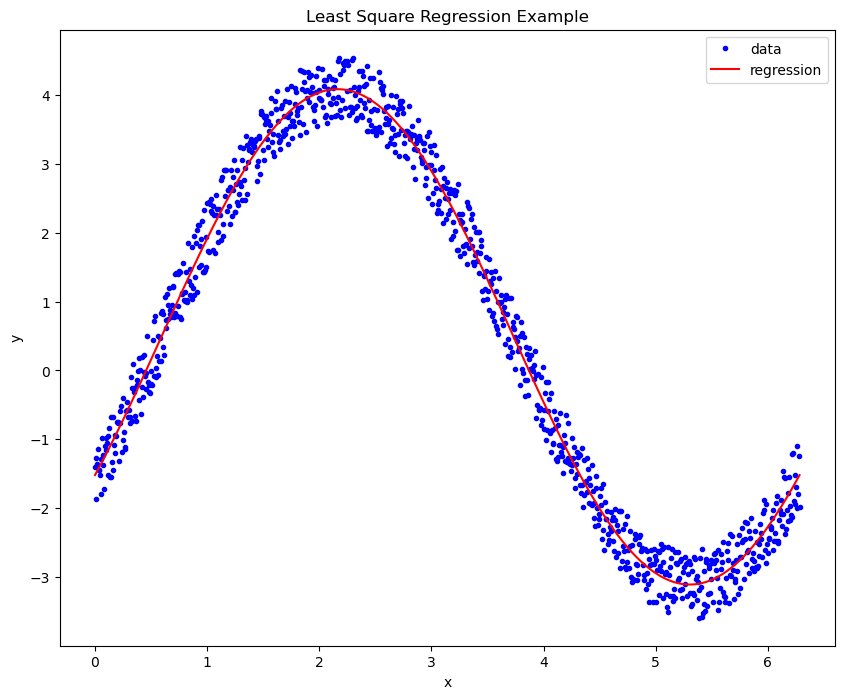

In [5]:
def my_lin_regression(f, x, y):
    n = len(f)  # number of basis functions
    X = np.vstack([f[i](x) for i in range(n)]).T
    X = np.hstack([X, np.ones((len(x), 1))])  # include a column of ones for the intercept term
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    return beta

x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]

beta = my_lin_regression(f, x, y)

plt.figure(figsize=(10, 8))
plt.plot(x, y, "b.", label="data")
plt.plot(x, beta[0]*f[0](x) + beta[1]*f[1](x) + + beta[2] , "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Square Regression Example")
plt.legend()
plt.show()

6.  Write a function my_exp_regression (x,y) where x and y are arrays of the same size.            
Let an estimation function for the data contained in x and y be defined as 
$$y(x) = αeβx$$ 
Your function should compute $α$ and $β$ to solve the least squares regression formula.

Test Cases: Note that your solution may vary slightly from the test case, depending on the random
numbers generated.

`x = np.linspace(0, 1, 1000)`                                                                       
`y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))`                                              
`alpha, beta = my_exp_regression(x, y)`                                                              
`plt.figure(figsize = (10,8))`                                                                      
`plt.plot(x,y,"b.", label = "data")`                                                              
`plt.plot(x, alpha*np.exp(beta*x), "r", label="regression")`                                      
`plt.xlabel("x")`                                                                                 
`plt.ylabel("y")`                                                                                    
`plt.title("Least Square Regression on Exponential Model")`                                        
`plt.legend()`                                                                                     
`plt.show()`

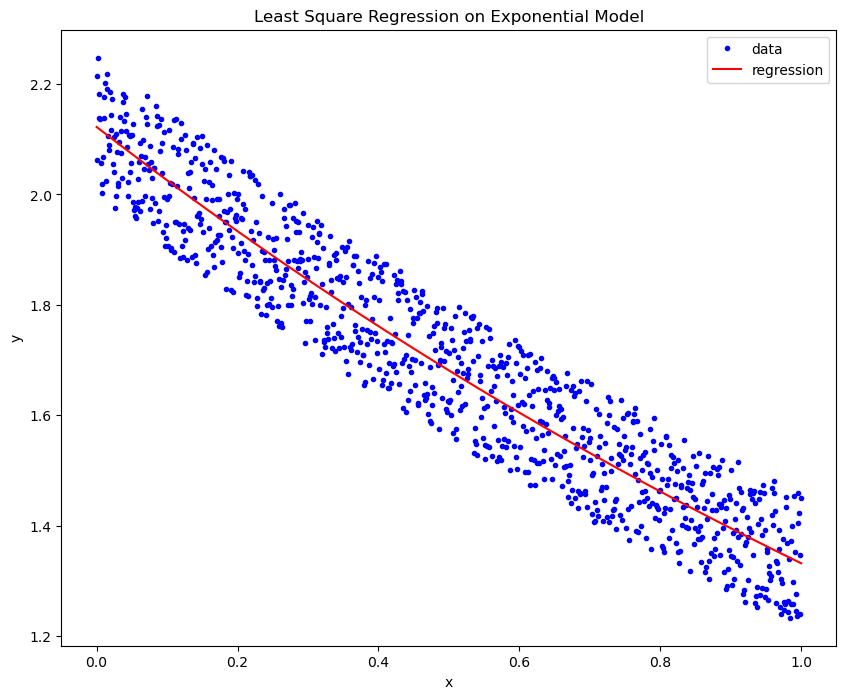

In [6]:
def my_exp_regression(x, y):
    n = len(x)
    X = np.vstack([np.ones(n), x]).T
    Y = np.log(y)
    beta = np.linalg.lstsq(X, Y, rcond=None)[0]
    alpha = np.exp(beta[0])
    beta = beta[1]
    return alpha, beta


x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))
alpha, beta = my_exp_regression(x, y)
plt.figure(figsize = (10,8))
plt.plot(x,y,"b.", label = "data")
plt.plot(x, alpha*np.exp(beta*x), "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Square Regression on Exponential Model")
plt.legend()
plt.show()